## Deep Neural Network model with top n feature selection
*Summary:* In this notebook, we use a DNN model to predict `attack_cat` labels.

In [135]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

train = pd.read_csv("../dataset/UNSW_NB15_training-set.csv")
test = pd.read_csv("../dataset/UNSW_NB15_testing-set.csv")

df = pd.concat([train, test]).reset_index(drop=True)
df = df.drop(columns=["id"])
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,Generic,1
257669,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.98057,3721.068786,120.177727,255,3518776216,3453092386,255,0.09944,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,Shellcode,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,Generic,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.00000,0.000000,0.000000,0,0,0,0,0.00000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,Generic,1


In [148]:
labels = df['attack_cat']
x_df = df.drop(columns=['label', 'attack_cat']).reset_index(drop=True)

### Preprocessing
The preprocessing includes the reduction of categorical features, one hot encoding the selected categorical features, and clamping the features that have a maximum of 10 times the median to the 95th quantile. 

In [149]:
from preprocessing import apply_clamping, reduce_top_n

x_df = reduce_top_n(x_df, 6)

num_cols = x_df.select_dtypes(include=[np.number]).columns
cat_cols = x_df.select_dtypes(exclude=[np.number]).columns

x_df = pd.concat([x_df[num_cols], pd.get_dummies(x_df[cat_cols])], axis=1)

x_df = apply_clamping(x_df)

In [153]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_df.iloc[:, :39] = sc.fit_transform(x_df.iloc[:, :39])

pca = PCA(n_components=0.95)
x = pca.fit_transform(x_df)

x_df = pd.DataFrame(x)
x_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-2.014944,0.469886,-3.077457,-0.019916,-0.173748,-0.927803,-0.189167,0.822529,0.066998,0.209347,0.239895,0.090756,0.198020,-0.412241,-0.008397,0.412641,0.226176,0.068529
1,-2.065074,0.459652,-3.320850,0.613216,-0.938222,-2.732372,-0.435043,0.938008,0.414113,0.347030,1.504895,-0.140037,0.933156,-1.078401,-0.019597,1.186701,0.306238,0.352585
2,-2.329349,0.465169,-3.213473,0.431568,-0.737491,-2.371315,-0.437540,1.337773,0.390465,0.096509,1.496148,-0.311079,0.749638,-0.760241,-0.010902,0.755287,0.252513,0.339479
3,-2.384417,0.443136,-3.043927,0.314568,-0.587374,-2.010310,-0.388866,1.280947,0.321480,0.071134,1.268790,-0.287257,0.613011,-0.600361,-0.010644,0.743385,0.180112,0.265097
4,-2.137309,0.407561,-3.087595,0.662123,-0.969881,-2.738512,-0.430114,0.787982,0.407979,0.386410,1.460976,-0.089712,0.986640,-1.127762,-0.021284,1.260633,0.284294,0.321621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,-5.395606,-0.466510,3.146856,0.130519,0.002428,0.276091,0.138845,-0.829277,-0.057437,0.258411,-0.323883,0.080433,-0.442826,0.308808,-0.016149,1.010396,-0.277322,-0.102809
257669,2.926249,1.836473,-0.274380,0.810165,-0.423566,1.125426,1.431015,0.126185,-0.991901,-1.306552,0.146652,0.669608,-0.263193,0.349303,0.029958,0.200853,0.752553,0.503484
257670,-2.768476,0.234406,-1.332071,-0.263154,0.174046,0.117197,0.082355,0.096725,-0.120576,0.408104,-0.689454,0.440006,-0.085610,-0.431987,0.005815,-0.697124,0.589288,0.097517
257671,-5.843894,-0.584415,3.872439,0.222582,-0.054668,0.312467,0.139439,-0.922424,-0.043677,0.186915,-0.270716,0.158511,-0.125897,0.030764,-0.011449,0.648902,-0.219837,-0.121845


As can be seen below, the attack categories are imbalanced

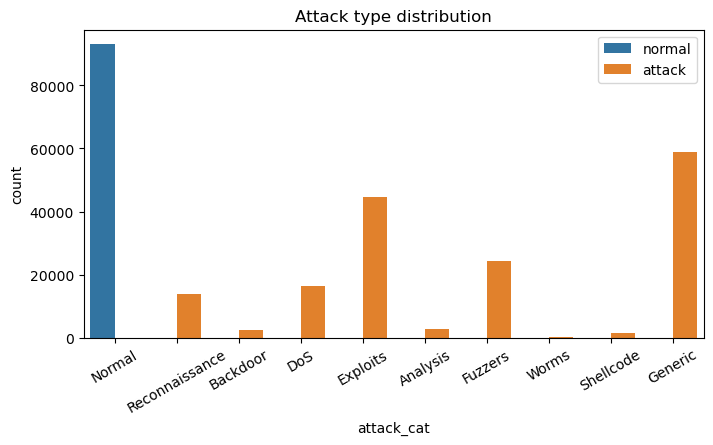

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,4))
ax = sns.countplot(x='attack_cat', hue='label', data=df)
ax.legend(loc="upper right", labels=('normal', 'attack'))
ax.set_title("Attack type distribution")
plt.xticks(rotation=30)
plt.show()

In [92]:
labels.value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

We use the SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset 

In [154]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_df, labels)
(X_res.shape, y_res.shape)

((930000, 18), (930000,))

In [98]:
X_res = X_res.iloc[:300000, :]
y_res = y_res.iloc[:300000]

In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_res.iloc[:, :39] = sc.fit_transform(X_res.iloc[:, :39])

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=.33, random_state=42)

X_val = X_train.iloc[-10000:]
y_val = y_train.iloc[-10000:]

X_train = X_train.iloc[:-10000]
y_train = y_train.iloc[:-10000]

(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

((613100, 18), (306900, 18), (10000, 18), (613100,), (306900,), (10000,))

In [156]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

In [157]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(100, activation='relu', input_dim=X_train.shape[1]),
        layers.Dense(100, activation='relu', use_bias=True),
        layers.Dense(100, activation='relu', use_bias=True),
        layers.Dense(100, activation='relu', use_bias=True),
        layers.Dense(100, activation='relu', use_bias=True),
        layers.Dense(10, activation='softmax', use_bias=True)
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1900      
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 43,310
Trainable params: 43,310
Non-trai

In [158]:
model.compile('adam', loss='categorical_crossentropy', metrics='accuracy')

In [159]:
import os

checkpoint_path = "../models/model_dnn_mc_top10.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [160]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(X_train,
                    y_train, 
                    validation_data=(X_val, y_val),
                    epochs=100, 
                    batch_size=1000, 
                    shuffle=True, 
                    verbose=2,
                    callbacks=[cp_callback])

Epoch 1/100

Epoch 1: saving model to ../models\model_dnn_mc_top10.ckpt
614/614 - 9s - loss: 0.9914 - accuracy: 0.6197 - val_loss: 0.8406 - val_accuracy: 0.6689 - 9s/epoch - 15ms/step
Epoch 2/100

Epoch 2: saving model to ../models\model_dnn_mc_top10.ckpt
614/614 - 10s - loss: 0.8045 - accuracy: 0.6787 - val_loss: 0.8084 - val_accuracy: 0.6751 - 10s/epoch - 16ms/step
Epoch 3/100

Epoch 3: saving model to ../models\model_dnn_mc_top10.ckpt
614/614 - 7s - loss: 0.7732 - accuracy: 0.6881 - val_loss: 0.7582 - val_accuracy: 0.6876 - 7s/epoch - 12ms/step
Epoch 4/100

Epoch 4: saving model to ../models\model_dnn_mc_top10.ckpt
614/614 - 10s - loss: 0.7540 - accuracy: 0.6928 - val_loss: 0.7466 - val_accuracy: 0.6931 - 10s/epoch - 17ms/step
Epoch 5/100

Epoch 5: saving model to ../models\model_dnn_mc_top10.ckpt
614/614 - 7s - loss: 0.7397 - accuracy: 0.6977 - val_loss: 0.7358 - val_accuracy: 0.6982 - 7s/epoch - 11ms/step
Epoch 6/100

Epoch 6: saving model to ../models\model_dnn_mc_top10.ckpt
614/

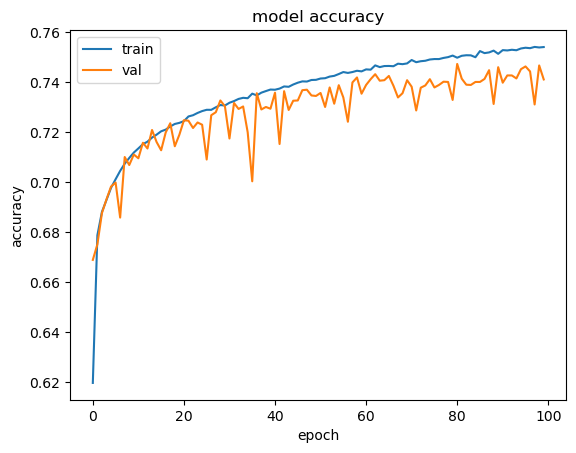

In [161]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

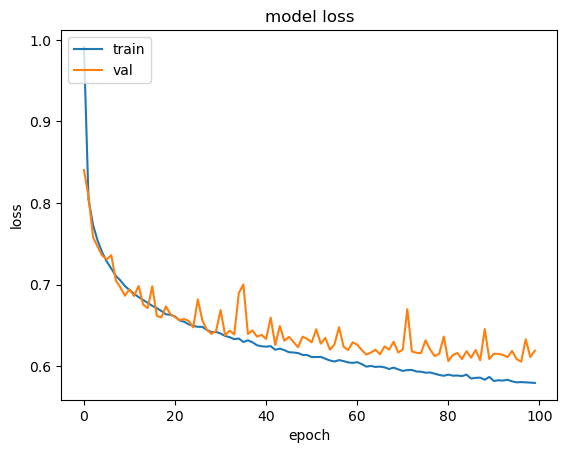

In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [163]:
y_pred = model.predict(X_test)

9591/9591 [==============================] - 10s 1ms/step


In [164]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob = self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, sorted(list(labels.unique())))

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.to_numpy().argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

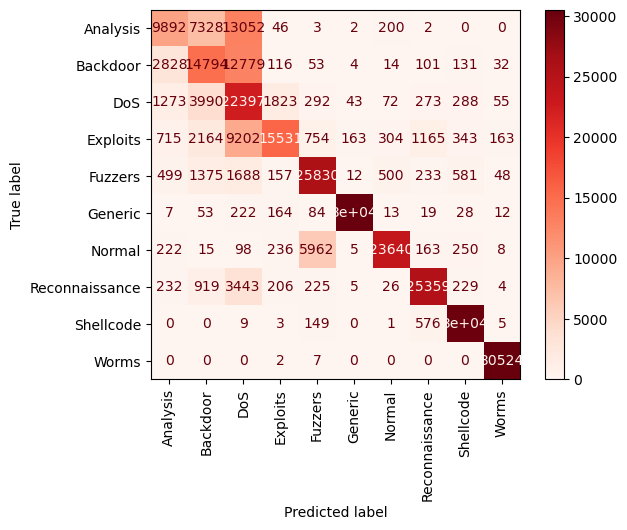

In [166]:
disp.plot(cmap=plt.cm.Reds, xticks_rotation=90)

In [174]:
from sklearn.metrics import accuracy_score

ys = y_test.to_numpy().argmax(axis=1)
ys_pred = y_pred.argmax(axis=1)

accuracy_score(ys, ys_pred)

0.7443206256109481